<a href="https://colab.research.google.com/github/Amenbo1219/tsuredure-Notebook/blob/main/Depth_arekore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install open3d numpy

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.8
    Uninstalling widgetsnbextension-3.6.8:
      Successfully uninstalled widgetsnbextension-3.6.8
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
# DPTファイルを読み込む
dpt_file = "/content/0001_depth.dpt"
depth_image = o3d.io.read_image(dpt_file)

# NumPy配列に変換
depth_array = np.asarray(depth_image)

# 深度データを表示または処理
print(depth_array.shape)
print(depth_array)
# plt.imshow(depth_array)

In [4]:
import numpy as np
import struct

def read_dpt(file_path):
    with open(file_path, 'rb') as f:
        # ファイルサイズを取得
        f.seek(0, 2)
        file_size = f.tell()
        f.seek(0)

        # ヘッダー情報を読み込む
        header = f.read(8)
        width, height = struct.unpack('II', header)
        print(f"Image dimensions: {width}x{height}")

        # 深度データを読み込む
        depth_data = np.frombuffer(f.read(), dtype=np.float32)

        # 2D配列に整形
        depth_image = depth_data.reshape((height, width))

    return depth_image

# DPTファイルを読み込む
dpt_file = "0001_depth.dpt"
depth_array = read_dpt(dpt_file)

# 深度データを表示または処理
print(depth_array.shape)
print(depth_array[:5, :5])  # 最初の5x5ピクセルを表示

Image dimensions: 1212500304x2048


ValueError: cannot reshape array of size 2097153 into shape (2048,1212500304)

-10.0 10.507003
(1024, 2048)
[1.4661144 1.466115  1.4661156 ... 1.466113  1.4661134 1.4661138]


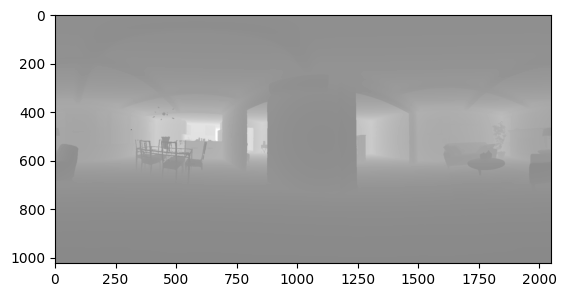

In [20]:
from struct import unpack
import cv2
dpt_file_path = "/content/0001_depth.dpt"
TAG_FLOAT = 202021.25  # check for this when READING the file
fid = open(dpt_file_path, 'rb')
tag = unpack('f', fid.read(4))[0]
width = unpack('i', fid.read(4))[0]
height = unpack('i', fid.read(4))[0]
assert tag == TAG_FLOAT, ('readFlowFile(%s): wrong tag (possibly due to big-endian machine?)' % dpt_file_path)
assert 0 < width and width < 100000, ('readFlowFile(%s): illegal width %d' % (dpt_file_path, width))
assert 0 < height and height < 100000, ('readFlowFile(%s): illegal height %d' % (dpt_file_path, height))

# arrange into matrix form
depth_data = np.fromfile(fid, np.float32)
depth_data = depth_data.reshape(height, width)

fid.close()
print(depth_data.min(),depth_data.max())
print(depth_data.shape)
print(depth_data[0])
plt.imshow(depth_data,cmap='gray')

-7.450581e-09 1.0
0 255
(1024, 2048, 3)
[[ 70 255 186]
 [ 70 255 186]
 [ 70 255 186]
 ...
 [ 70 255 186]
 [ 70 255 186]
 [ 70 255 186]]


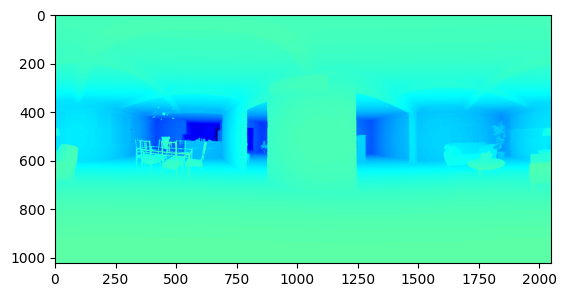

In [21]:
normalized = cv2.normalize(depth_data, None, 0, 1, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
print(normalized.min(),normalized.max())
# JetカラーマップをRGB形式で適用
jet_image = cv2.applyColorMap((normalized * 255).astype(np.uint8), cv2.COLORMAP_JET)
print(jet_image.min(),jet_image.max())
print(jet_image.shape)
print(jet_image[0])
plt.imshow(jet_image)

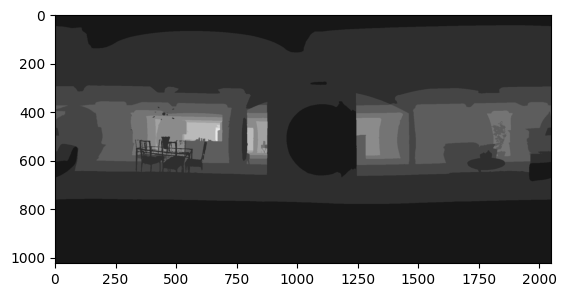

In [17]:
# 容易に書き出すと丸められるので注意
cv2.imwrite("/content/0001_depth.pfm",depth_data)
dep = cv2.imread("/content/0001_depth.pfm")
plt.imshow(dep,cmap="gray")